# Ford Gobike Riders Data Feb 2019

# Overview

In this investigation, I wanted to look at the features of bike riders that could be used to predict their behaviour.           

The main focus was on the four Features: member gender, user type, duration in mintues & days of week.

# Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read CSV file.
df = pd.read_csv('fordgobike_tripdata.csv')

# Bike Riders Member Gender Ratio

It seems that the proportion of male is represent the majority of bike riders with **74.6%** . while the proportion of female bike riders is only **23.3%** , and the other(unspecific) proportion is **2.1%**.



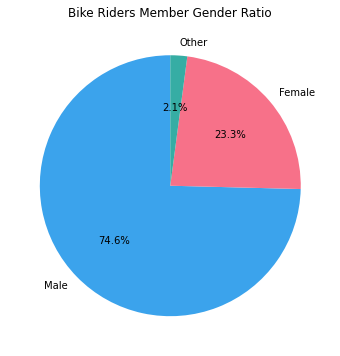

In [3]:
#Visualizing the bike riders based on member_gender.
member_gender_counts= df.member_gender.value_counts()
plt.figure(figsize=[8,6])
plt.pie(member_gender_counts,
        labels= member_gender_counts.index,
        startangle= 90, autopct='%1.1f%%',
        colors= [sb.color_palette('husl')[4],sb.color_palette('husl')[0],sb.color_palette('husl')[3]]);
plt.title('Bike Riders Member Gender Ratio');

# Bike Riders Based on The Type

Slightly above **160,000** of bike riders are members (Subscriber) , however **20,000** of bike riders are non-members (Customers) which's a huge difference.

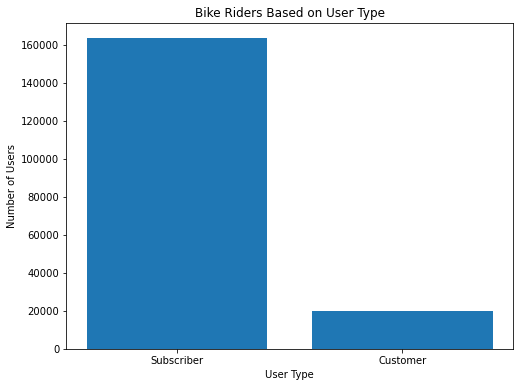

In [4]:
#Visualizing of bike riders based on user_type.
plt.figure(figsize=[8,6])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts())
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Bike Riders Based on User Type')
plt.show()

# Trip Duration

The most bike riders' trip duration is **5 minutes**, and as we observed the trip duration data distribution is right-skewed which means that as the trip duration becomes longer the number of bike riders decreases.

In [5]:
#duration in minutes.
df['duration_min'] = df['duration_sec']//60

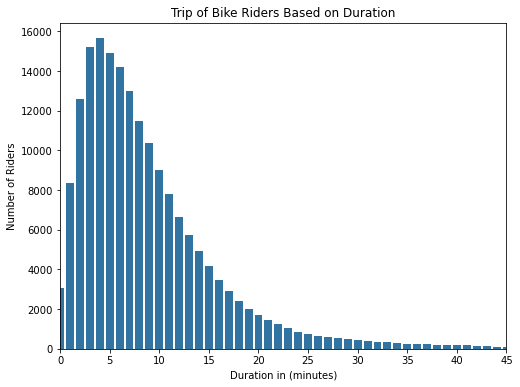

In [6]:
#Visualizing of bike riders based on user_type.
plt.figure(figsize=(8,6))
base_color= sb.color_palette()[0]
sb.countplot(data= df, x='duration_min', color = base_color)
plt.xlim((0,40))
plt.title('Trip of Bike Riders Based on Duration')
plt.ylabel('Number of Riders')
plt.xlabel('Duration in (minutes)')
plt.xticks([0,5,10,15,20,25,30,35,40,45],[0,5,10,15,20,25,30,35,40,45]);

# The Trip Duration Based on The Bike Rider Gender/Type

The female & other genders tend to spend slightly more time in the trip duration , whereas most of the men tend to usually spend less time. And the non-members (Customers) are more likely to spend more time in the trip duration than the members(Subscribers).

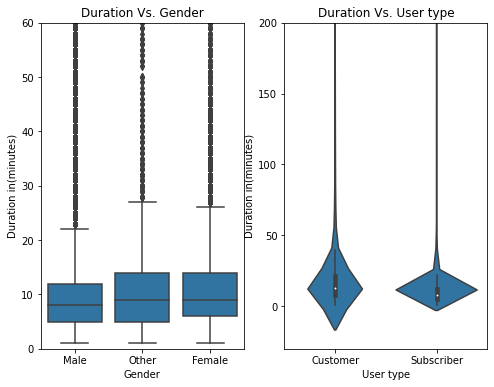

In [8]:
#Visualizing member_gender Vs. duration in minutes.
plt.figure(figsize = [8, 6])
plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.xlabel('Gender')
plt.ylabel('Duration in(minutes)')
plt.title('Duration Vs. Gender')
#Visualizing user type Vs. duration in minutes.
plt.subplot(1, 2, 2)
sb.violinplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([-30, 200])
plt.xlabel('User type')
plt.ylabel('Duration in(minutes)')
plt.title('Duration Vs. User type')
plt.show()

# Bike Rider Type Vs. Days

Generally , the members (subscribers) tend to use the bikes for their trips more often compared to the non-members (customers) over the weekdays. Also , we observed that both members and non-members are less likely to use the bikes on the weekends.

In [10]:
#Create new columns for weekday/weekend & days.
df['start_time']= pd.to_datetime(df['start_time'])
df['day']= df['start_time'].dt.day_name()
day_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'] 

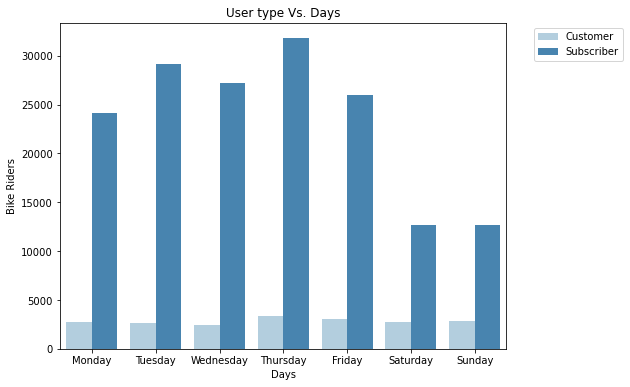

In [11]:
##Visualizing user_type Vs.days.
plt.figure(figsize= (8,6))
sb.countplot(data= df, hue='user_type', x= 'day', palette= 'Blues', order= day_order)
plt.xlabel('Days')
plt.ylabel('Bike Riders')
plt.title('User type Vs. Days')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

# Days Vs. Trip Duration

The median of duration is almost the same during all days. However, The trip duration on the weekends is slightly more than on the weekdays.

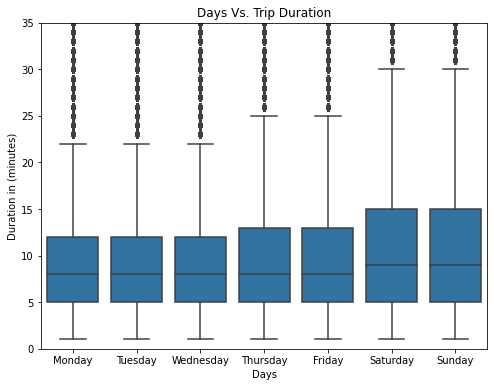

In [12]:
#Visualizing duration Vs.days.
plt.figure(figsize= (8,6))
sb.boxplot(data= df, x='day', y='duration_min', color= base_color, order= day_order)
plt.ylim(0,35)
plt.xlabel('Days')
plt.ylabel('Duration in (minutes)')
plt.title('Days Vs. Trip Duration');

# Trip Duration Based on Bike Riders Ages and Gender

There are less bike riders in their **70 - 80 years old** for both genders. In total ,  a lot of the trip duration is usually **200 minutes or less** , and the longest trip duration made by the males is for **43 years old man** ,  while the longest trip duration made by the females is for **61 years old women**.

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


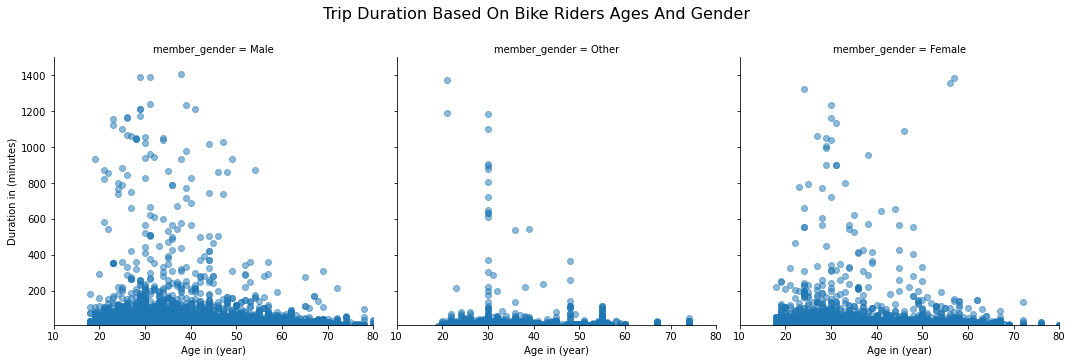

In [13]:
#Visualizing trip duration based bike riders ages.
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 5,
                 xlim = [10, 80], ylim = [10, 1500])
gender.map(plt.scatter, 'age', 'duration_min', alpha=0.5)
gender.set_xlabels('Age in (year)')
gender.set_ylabels('Duration in (minutes)')
plt.suptitle('Trip duration based on bike riders ages and gender'.title(), y = 1,
            fontsize = 16)
plt.tight_layout();

# The Duration of Bike Riders Over Days Based on The Type

The trip duration of the non-members on weekends is usually longer than the weekdays , whereas for the trip duration of the members relatively tends to be the same duration during all the weekdays , but it slightly tends to be more on the weekends.

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


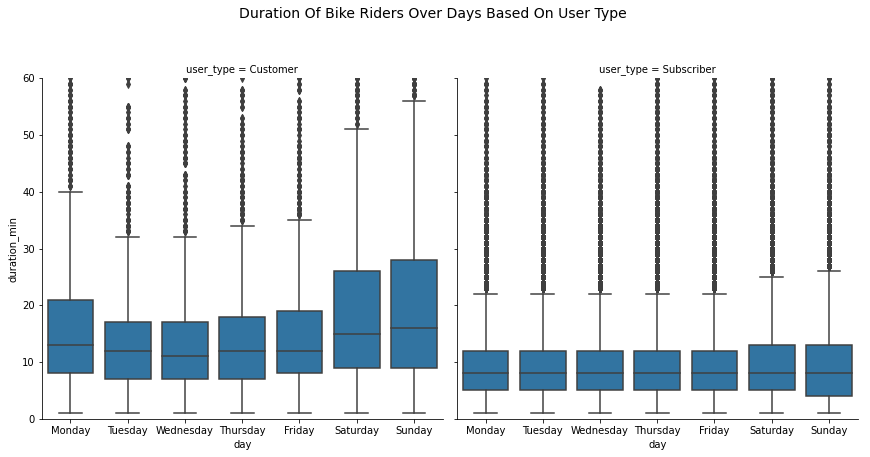

In [14]:
#Visualizing duration of bike riders over days based on user type.
g= sb.FacetGrid(data= df, col= 'user_type', size=6)
g.map(sb.boxplot, 'day', 'duration_min', order= day_order)
plt.ylim(0,60)
g.add_legend()
plt.suptitle('Duration of bike riders over days based on user type'.title(), y = 1.05,
            fontsize = 14)
plt.tight_layout()
gender.fig.set_size_inches(10, 8);

# Daily Usage of The Bikes Based The Type and Gender.

Regardless of whether the bike rider is female or male , member or non member the trip duration will be longer on Thursdays than the other days.

We may say that : based on the trip duration of the subscribers in this dataset , any individual who frequently need to use a bike are more likely to subscribed. 

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x576 with 0 Axes>

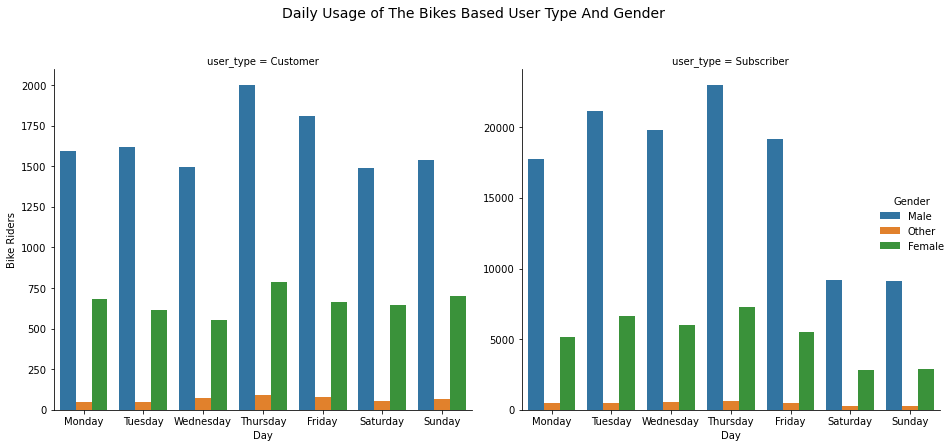

In [15]:
#Visualing daily usage of the bikes based user type and gender.
plt.figure(figsize= (14, 8))
g = sb.catplot(data=df, x='day', col='user_type', hue='member_gender', kind='count', order= day_order, size= 6, sharey = False)
g.set_axis_labels('Day', 'Bike Riders')
g._legend.set_title('Gender')
g.fig.suptitle('Daily Usage of The Bikes Based User Type And Gender', y=1.03, fontsize=14)
plt.tight_layout()
gender.fig.set_size_inches(14, 8);

In [ ]:
!jupyter nbconvert Explanatory_Analysis_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt